In [1]:
# !pip install pydotplus

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz

import numpy as np
import pandas as pd
import yaml
import pydotplus
import ast
import plotly.express as px

In [3]:
%run ./src/database.py
%run ./src/util.py
%run ./src/data_preprocessing.py
%run ./src/feature_engineering.py
%run ./src/visualisation.py
%run ./src/model_build.py

In [4]:
YAML_FILEPATHNAME = "./config.yaml"
DATA_PATH =  "./data/"
PRE_CRUISE_DB = 0
POST_CRUISE_DB = 1

In [5]:
# Set display option to show all columns
pd.set_option('display.max_columns', None)
# Initialise DataProcessing Class
dp = DataProcessing()
# Initialise FeatureEngineering Class
fe = FeatureEngineering()
# Initialise ModelBuild Class
mb = ModelBuild()

# Read yaml config and data

In [6]:
# Read YAML file
yaml_data = read_yaml(YAML_FILEPATHNAME)
DISPLAY_STUB = yaml_data['display_stub']
TEST_SIZE = yaml_data['test_size']
RANDOM_STATE = yaml_data['random_state']
TARGET_VARIABLE = yaml_data['target_variable']
DB_INFO = yaml_data['databases']
COMPOSITE_FIELD_INFO = yaml_data['composite_fields_to_split']
ID_FIELDS = ast.literal_eval(yaml_data['ID_columns'])
DATETIME_FIELD_INFO = yaml_data['convert_obj_datetime']
NUMERIC_FIELD_INFO = yaml_data['convert_obj_numeric']
MISSING_VAL_THRESHOLD =  yaml_data['pct_missing_threshold']
CONTINUOUS_VARIABLE = ast.literal_eval(yaml_data['continuous_variables'])
DIRTY_DATA_INFO = yaml_data['dirty_data_setting']
VALID_DATA_INFO = yaml_data['valid_data_setting']
NON_NUMERIC_COL = yaml_data['non_numeric_cols']
DATE_YYYY_INFO = yaml_data['convert_date_yyyy']
IMPUTE_MISSING_VALUE_INFO = yaml_data['impute_missing_value']
OHE_FIELDS = ast.literal_eval(yaml_data['one_hot_encode'])
DIFF_YEARS = yaml_data['diff_year']
VERBOSE = yaml_data['verbose']
COL_TO_NORMALISE = ast.literal_eval(yaml_data['column_to_normalise'])
SCALAR_OPT = yaml_data['scalar_option']
SELECTED_MODELS = yaml_data['selected_models']

In [9]:
db_read("./data/", {'file_name': 'cruise_pre.db', 'table_name': 'cruise_pre', 'index': 'index'})

,Gender,Date of Birth,Source of Traffic,Onboard Wifi Service,Embarkation/Disembarkation time convenient,Ease of Online booking,Gate location,Logging,Onboard Dining Service,Online Check-in,Cabin Comfort,Onboard Entertainment,Cabin service,Baggage handling,Port Check-in Service,Onboard Service,Cleanliness,Ext_Intcode
index,,,,,,,,,,,,,,,,,,
0,None,05/10/1973,Direct - Company Website,A little important,3.0,5.0,3.0,01/01/2023 0:00,Very important,2.0,2.0,A little important,2.0,2.0,4.0,2.0,3.0,LB446RWOOZI
1,Female,None,Indirect - Social Media,Not at all important,4.0,1.0,NaN,01/01/2023 0:01,Very important,NaN,4.0,None,2.0,3.0,4.0,4.0,4.0,LB138HKBECM
2,Female,22/07/1998,Indirect - Search Engine,None,3.0,0.0,5.0,01/01/2023 0:02,None,NaN,5.0,Extremely important,2.0,1.0,2.0,3.0,NaN,BL713UHBAAN
3,Female,01/05/1970,Direct - Company Website,Very important,4.0,4.0,4.0,01/01/2023 0:05,Somewhat important,4.0,4.0,None,NaN,NaN,3.0,2.0,4.0,LB243DMKCFL
4,Male,07/01/1960,Direct - Company Website,Somewhat important,4.0,2.0,NaN,01/01/2023 0:06,Not at all important,2.0,NaN,Not at all important,3.0,NaN,5.0,2.0,NaN,LB218CFLOBS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133741,Female,None,Indirect - Search Engine,A little important,1.0,1.0,4.0,31/08/2023 23:38,None,2.0,NaN,Very important,5.0,NaN,3.0,5.0,NaN,LB957GHIRBD
133742,Female,14/09/1988,Direct - Email Marketing,A little important,2.0,NaN,2.0,31/08/2023 23:38,Somewhat important,3.0,2.0,A little important,2.0,2.0,3.0,2.0,NaN,BL409CVKQKQ
133743,Male,23/10/2012,Direct - Email Marketing,Extremely important,5.0,5.0,5.0,31/08/2023 23:41,Extremely important,5.0,5.0,Extremely important,4.0,5.0,4.0,4.0,5.0,BL343MAXXIT


In [7]:
print(DB_INFO[PRE_CRUISE_DB])
# Read Pre_cruise data
df_pre_cruise = db_read(DATA_PATH, DB_INFO[PRE_CRUISE_DB])

{'file_name': 'cruise_pre.db', 'table_name': 'cruise_pre', 'index': 'index'}


In [8]:
# Read Post_cruise data
df_post_cruise = db_read(DATA_PATH, DB_INFO[POST_CRUISE_DB])

In [9]:
# Merge Pre_cruise and Post_cruise to form df_cruise with Index as the key
df_cruise = db_merge_db (df_pre_cruise, df_post_cruise)

In [10]:
# Preview of df_cruise dataset
df_cruise.head(3)

,Gender,Date of Birth,Source of Traffic,Onboard Wifi Service,Embarkation/Disembarkation time convenient,Ease of Online booking,Gate location,Logging,Onboard Dining Service,Online Check-in,Cabin Comfort,Onboard Entertainment,Cabin service,Baggage handling,Port Check-in Service,Onboard Service,Cleanliness,Ext_Intcode_x,Cruise Name,Ticket Type,Cruise Distance,Ext_Intcode_y,WiFi,Dining,Entertainment
index,,,,,,,,,,,,,,,,,,,,,,,,,
0,None,05/10/1973,Direct - Company Website,A little important,3.0,5.0,3.0,01/01/2023 0:00,Very important,2.0,2.0,A little important,2.0,2.0,4.0,2.0,3.0,LB446RWOOZI,Blastoise,None,3567 KM,LB446RWOOZI,1.0,1,1.0
1,Female,None,Indirect - Social Media,Not at all important,4.0,1.0,NaN,01/01/2023 0:01,Very important,NaN,4.0,None,2.0,3.0,4.0,4.0,4.0,LB138HKBECM,Blastoise,Deluxe,672 KM,LB138HKBECM,NaN,0,1.0
2,Female,22/07/1998,Indirect - Search Engine,None,3.0,0.0,5.0,01/01/2023 0:02,None,NaN,5.0,Extremely important,2.0,1.0,2.0,3.0,NaN,BL713UHBAAN,IAPRAS,Deluxe,1167 KM,BL713UHBAAN,NaN,0,0.0


In [11]:
# Check number of rows and columns in df_cruise
df_cruise.shape

(130875, 25)

In [12]:
# Get information of cruise_df
df_cruise.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130875 entries, 0 to 133745
Data columns (total 25 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Gender                                      117691 non-null  object 
 1   Date of Birth                               116495 non-null  object 
 2   Source of Traffic                           130875 non-null  object 
 3   Onboard Wifi Service                        111800 non-null  object 
 4   Embarkation/Disembarkation time convenient  115568 non-null  float64
 5   Ease of Online booking                      112945 non-null  float64
 6   Gate location                               114087 non-null  float64
 7   Logging                                     130875 non-null  object 
 8   Onboard Dining Service                      114404 non-null  object 
 9   Online Check-in                             115529 non-null  float64
 10  C

<div style="background-color: #b0e0e6; border-radius: 10px; padding: 10px; border: 1px solid #ccc; color: black;">
<strong>Comments:</strong>
<p>There are a lot of missing values. We may need to either drop rows and impute missing values.</p>
<p>Out of 23 features, 9 are not in numbers.</p>
<p>Target label - Ticket Type is not in number. May require ordinal label encoding.</p>
<p>Few things to consider:</p>
<ul>
    <ol>
    <li>Ticket Type is our target and we should not impute the missing values in this column. Imputing the target variable can introduce bias into the dataset, potentially overfit and affect the accuracy of the predictive model.</li>
    <li>Gender and Date of Birth as very specific profile information of guests. We should not impute them. It will also introduce bias to the dataset. In this project, we need to preserve the authenticity of guests's profiles in order to capture the buying pattern and possibly future purchase. These are sensitive pieces of information, and tampering with them may not be ethical or necessary for our analysis.</li>
    <li>The remaining columns with missing values, we shall use statistical methods to impute.</li>
    <li>Date of Birth and Logging dtype is object. Convert them to datetime dtype for time-series analysis if required.</li>
</ul>
<p><strong>Actions to Take:</strong></p>
<ol>
    <li>Drop rows with missing values in Ticket Type, Gender and Date of Birth.</li>
    <li>Impute missing values with statistical methods.</li>
    <li>Convert Date of Birth and Logging to dtype datetime.</li>
    <li>Check for Duplicates.</li>
    <li>Encode or map string type columns to numbers.</li> 
</ol>
</div>

<div style="background-color: #b0e0e6; border-radius: 10px; padding: 10px; border: 1px solid #ccc; color: black;">
<strong>Classifying Columns to Their Variable Types:</strong>
<p>Binary:</p>
    <ol>
    <li>Gender</li>
    <li>WiFi</li>
    <li>Dining</li>
    <li>Entertainment</li>
    </ol>
<p>Categorical:</p>
    <ol>
    <li>Source of Traffic</li>
    <li>Cruise Name</li>
    </ol>
<p>Ordinal:</p>
    <ol>
    <li>Onboard Wifi Service</li>
    <li>Onboard Dining Service</li>
    <li>Onboard Entertainment</li>
    <li>Onboard Service</li>
    <li>Embarkation/Disembarkation time convenient</li>
    <li>Gate location</li>
    <li>Online Check-in</li>
    <li>Cabin Comfort</li>
    <li>Cabin service</li>
    <li>Baggage handling</li>
    <li>Port Check-in Service</li>
    <li>Cleanliness</li>
    </ol>
<p>Date-time Features:</p>
    <ol>
    <li>Date of Birth</li>
    <li>Logging</li>
    </ol>
<p>Continuous Numerical:</p>
    <ol>
    <li>Cruise Distance</li>
    </ol>
<p>Unique Key:</p>
    <ol>
    <li>Ext_Intcode</li>
    </ol>
<p>y Target (Ordinal):</p>
    <ol>
    <li>Ticket Type</li>
    </ol>
<p>There could be additional features created during feature engineering like obtaining Age from Date of Birth and Logging.</p>
</div>

In [13]:
df_cruise.describe().T

,count,mean,std,min,25%,50%,75%,max
Embarkation/Disembarkation time convenient,115568.0,3.055318,1.526321,0.0,2.0,3.0,4.0,5.0
Ease of Online booking,112945.0,2.756988,1.402277,0.0,2.0,3.0,4.0,5.0
Gate location,114087.0,2.978113,1.278204,0.0,2.0,3.0,4.0,5.0
Online Check-in,115529.0,3.249652,1.350666,0.0,2.0,3.0,4.0,5.0
Cabin Comfort,110971.0,3.439043,1.321625,0.0,2.0,4.0,5.0,5.0
Cabin service,117316.0,3.383682,1.287685,0.0,2.0,4.0,4.0,5.0
Baggage handling,110930.0,3.632841,1.179379,1.0,3.0,4.0,5.0,5.0
Port Check-in Service,116824.0,3.307659,1.266525,1.0,3.0,3.0,4.0,5.0
Onboard Service,112969.0,3.641353,1.178575,0.0,3.0,4.0,5.0,5.0
Cleanliness,112781.0,3.285660,1.313394,0.0,2.0,3.0,4.0,5.0


<div style="background-color: #b0e0e6; border-radius: 10px; padding: 10px; border: 1px solid #ccc; color: black;">
<strong>Comments:</strong>
    <ol>
    <li>There are a lot of features in Pre-Purchase survey that have min value 0. The value should not be 0 as the scale reference for these features are in Likert scale of 1 - 5. The 0s should be consider null values that require imputation.</li>
    <li>Nine features missing in the descriptive stats are string value.</li>
    <li>High number of missing values (almost half) in WiFi and Entertainnment. Those who answered Not Applicable ended up as null value. Since these columns represent satisfaction levels, it would be reasonable to impute the null values with a neutral or average satisfaction level. The three features should be considered as binary of Satisfied or Dissatisfied. Since the other response is Not Applicable, we can consider as it positive response rather than negative ones. Maintaining consistency in the variable type.</li>
    </ol>
<strong>Actions to Take:</strong>
    <ul>
<li>Assign numerical values to the Pre-Purchase survey features that are in string.</li>
<li>Replace 0 in the Pre-Purchase features as null and thereafter impute with statisical methods.</li>
<li>Impute Post-Trip features (WiFi, Entertaiment and Dining) with neutral average of 1.</li>
</ul>
</div>

# Preprocessing

### Data Cleaning:
- Replace all np.nan to None
- Split composite field
- Remove IDs columns as in general they will have no predictive power
- Column pruning due to high missing values.
- Convert fields from Object to Datetime
- Convert fields from Object to Numeric
- Removal of rows from Target Variable 
- Removal of rows from Continuous variable which has missing value 
- Dirty Data Cleansing
- Restriction of Column vales
- Imputation of missing value
- Label encode non-numeric categorical columns to get numeric values

**Replace all np.nan to None**
- This is to replace np.NaN to None to facilitate subsequent imputation

In [14]:
print(df_cruise['Ease of Online booking'][df_cruise['Ease of Online booking'].isna()].head(3))
dp.replace_nan_none(df_cruise)
print(df_cruise['Ease of Online booking'][df_cruise['Ease of Online booking'].isna()].head(3))

index
8    NaN
9    NaN
10   NaN
Name: Ease of Online booking, dtype: float64
index
8     None
9     None
10    None
Name: Ease of Online booking, dtype: object


**Split composite field**
- This step is to split those fields having 2 sets of data into individual field

In [15]:
dp.split_composite_field(df_cruise, COMPOSITE_FIELD_INFO)
df_cruise.head(5)

,Gender,Date of Birth,Onboard Wifi Service,Embarkation/Disembarkation time convenient,Ease of Online booking,Gate location,Logging,Onboard Dining Service,Online Check-in,Cabin Comfort,Onboard Entertainment,Cabin service,Baggage handling,Port Check-in Service,Onboard Service,Cleanliness,Ext_Intcode_x,Cruise Name,Ticket Type,Ext_Intcode_y,WiFi,Dining,Entertainment,Source,Traffic,Distance,Dist_Metrics
index,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,None,05/10/1973,A little important,3.0,5.0,3.0,01/01/2023 0:00,Very important,2.0,2.0,A little important,2.0,2.0,4.0,2.0,3.0,LB446RWOOZI,Blastoise,None,LB446RWOOZI,1.0,1,1.0,Direct,Company Website,3567,KM
1,Female,None,Not at all important,4.0,1.0,None,01/01/2023 0:01,Very important,None,4.0,None,2.0,3.0,4.0,4.0,4.0,LB138HKBECM,Blastoise,Deluxe,LB138HKBECM,None,0,1.0,Indirect,Social Media,672,KM
2,Female,22/07/1998,None,3.0,0.0,5.0,01/01/2023 0:02,None,None,5.0,Extremely important,2.0,1.0,2.0,3.0,None,BL713UHBAAN,IAPRAS,Deluxe,BL713UHBAAN,None,0,0.0,Indirect,Search Engine,1167,KM
3,Female,01/05/1970,Very important,4.0,4.0,4.0,01/01/2023 0:05,Somewhat important,4.0,4.0,None,None,None,3.0,2.0,4.0,LB243DMKCFL,Lapras,Deluxe,LB243DMKCFL,None,0,1.0,Direct,Company Website,280,KM
4,Male,07/01/1960,Somewhat important,4.0,2.0,None,01/01/2023 0:06,Not at all important,2.0,None,Not at all important,3.0,None,5.0,2.0,None,LB218CFLOBS,Lapras,Standard,LB218CFLOBS,None,1,None,Direct,Company Website,1145,Miles


**Remove IDs columns**
- This step is done because these ID fields have no predictive power

In [16]:
dp.rm_id_cols(df_cruise, ID_FIELDS)
df_cruise.head(5)

,Gender,Date of Birth,Onboard Wifi Service,Embarkation/Disembarkation time convenient,Ease of Online booking,Gate location,Logging,Onboard Dining Service,Online Check-in,Cabin Comfort,Onboard Entertainment,Cabin service,Baggage handling,Port Check-in Service,Onboard Service,Cleanliness,Cruise Name,Ticket Type,WiFi,Dining,Entertainment,Source,Traffic,Distance,Dist_Metrics
index,,,,,,,,,,,,,,,,,,,,,,,,,
0,None,05/10/1973,A little important,3.0,5.0,3.0,01/01/2023 0:00,Very important,2.0,2.0,A little important,2.0,2.0,4.0,2.0,3.0,Blastoise,None,1.0,1,1.0,Direct,Company Website,3567,KM
1,Female,None,Not at all important,4.0,1.0,None,01/01/2023 0:01,Very important,None,4.0,None,2.0,3.0,4.0,4.0,4.0,Blastoise,Deluxe,None,0,1.0,Indirect,Social Media,672,KM
2,Female,22/07/1998,None,3.0,0.0,5.0,01/01/2023 0:02,None,None,5.0,Extremely important,2.0,1.0,2.0,3.0,None,IAPRAS,Deluxe,None,0,0.0,Indirect,Search Engine,1167,KM
3,Female,01/05/1970,Very important,4.0,4.0,4.0,01/01/2023 0:05,Somewhat important,4.0,4.0,None,None,None,3.0,2.0,4.0,Lapras,Deluxe,None,0,1.0,Direct,Company Website,280,KM
4,Male,07/01/1960,Somewhat important,4.0,2.0,None,01/01/2023 0:06,Not at all important,2.0,None,Not at all important,3.0,None,5.0,2.0,None,Lapras,Standard,None,1,None,Direct,Company Website,1145,Miles


**Those columns with high missing values**
- Removing columns with high missing values can simplify data analysis and visualization
- Removing such columns can improve the performance of these models.
- Removing columns with high missing values can be a conservative approach to avoid potential imputation bias.

In [17]:
dp.rm_cols_high_missing(df_cruise,MISSING_VAL_THRESHOLD)
df_cruise.head(5)

,Gender,Date of Birth,Onboard Wifi Service,Embarkation/Disembarkation time convenient,Ease of Online booking,Gate location,Logging,Onboard Dining Service,Online Check-in,Cabin Comfort,Onboard Entertainment,Cabin service,Baggage handling,Port Check-in Service,Onboard Service,Cleanliness,Cruise Name,Ticket Type,Dining,Source,Traffic,Distance,Dist_Metrics
index,,,,,,,,,,,,,,,,,,,,,,,
0,None,05/10/1973,A little important,3.0,5.0,3.0,01/01/2023 0:00,Very important,2.0,2.0,A little important,2.0,2.0,4.0,2.0,3.0,Blastoise,None,1,Direct,Company Website,3567,KM
1,Female,None,Not at all important,4.0,1.0,None,01/01/2023 0:01,Very important,None,4.0,None,2.0,3.0,4.0,4.0,4.0,Blastoise,Deluxe,0,Indirect,Social Media,672,KM
2,Female,22/07/1998,None,3.0,0.0,5.0,01/01/2023 0:02,None,None,5.0,Extremely important,2.0,1.0,2.0,3.0,None,IAPRAS,Deluxe,0,Indirect,Search Engine,1167,KM
3,Female,01/05/1970,Very important,4.0,4.0,4.0,01/01/2023 0:05,Somewhat important,4.0,4.0,None,None,None,3.0,2.0,4.0,Lapras,Deluxe,0,Direct,Company Website,280,KM
4,Male,07/01/1960,Somewhat important,4.0,2.0,None,01/01/2023 0:06,Not at all important,2.0,None,Not at all important,3.0,None,5.0,2.0,None,Lapras,Standard,1,Direct,Company Website,1145,Miles


**Convert fields from Object to Datetime**

In [18]:
dp.obj_to_datetime(df_cruise, DATETIME_FIELD_INFO)
df_cruise.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130875 entries, 0 to 133745
Data columns (total 23 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   Gender                                      117691 non-null  object        
 1   Date of Birth                               111830 non-null  datetime64[ns]
 2   Onboard Wifi Service                        111800 non-null  object        
 3   Embarkation/Disembarkation time convenient  115568 non-null  object        
 4   Ease of Online booking                      112945 non-null  object        
 5   Gate location                               114087 non-null  object        
 6   Logging                                     130875 non-null  datetime64[ns]
 7   Onboard Dining Service                      114404 non-null  object        
 8   Online Check-in                             115529 non-null  object        
 9 

**Convert fields from Object to Numeric**

In [19]:
dp.numeric_conversion(df_cruise, NUMERIC_FIELD_INFO)
df_cruise.head(5)

,Gender,Date of Birth,Onboard Wifi Service,Embarkation/Disembarkation time convenient,Ease of Online booking,Gate location,Logging,Onboard Dining Service,Online Check-in,Cabin Comfort,Onboard Entertainment,Cabin service,Baggage handling,Port Check-in Service,Onboard Service,Cleanliness,Cruise Name,Ticket Type,Dining,Source,Traffic,Distance,Dist_Metrics
index,,,,,,,,,,,,,,,,,,,,,,,
0,None,1973-10-05,A little important,3.0,5.0,3.0,2023-01-01 00:00:00,Very important,2.0,2.0,A little important,2.0,2.0,4.0,2.0,3.0,Blastoise,None,1,Direct,Company Website,3567.0,KM
1,Female,NaT,Not at all important,4.0,1.0,None,2023-01-01 00:01:00,Very important,None,4.0,None,2.0,3.0,4.0,4.0,4.0,Blastoise,Deluxe,0,Indirect,Social Media,672.0,KM
2,Female,1998-07-22,None,3.0,0.0,5.0,2023-01-01 00:02:00,None,None,5.0,Extremely important,2.0,1.0,2.0,3.0,None,IAPRAS,Deluxe,0,Indirect,Search Engine,1167.0,KM
3,Female,1970-05-01,Very important,4.0,4.0,4.0,2023-01-01 00:05:00,Somewhat important,4.0,4.0,None,None,None,3.0,2.0,4.0,Lapras,Deluxe,0,Direct,Company Website,280.0,KM
4,Male,1960-01-07,Somewhat important,4.0,2.0,None,2023-01-01 00:06:00,Not at all important,2.0,None,Not at all important,3.0,None,5.0,2.0,None,Lapras,Standard,1,Direct,Company Website,1145.0,Miles


**Removal of rows from Target Variable**
- If the missing values in the target variable are randomly distributed across the dataset, removing those rows might not significantly impact the analysis.
- Imputing the target variable can be challenging, especially if the missing values are not random. Imputed values might introduce bias, and the imputation method should be carefully chosen.

In [20]:
print("There are " + str(df_cruise['Ticket Type'].isnull().sum()) + " missing value in Target Variables")
dp.rm_rows_target_var(df_cruise, TARGET_VARIABLE)
print("There are " + str(df_cruise['Ticket Type'].isnull().sum()) + " missing value in Target Variables")

There are 19976 missing value in Target Variables
There are 0 missing value in Target Variables


**Removal of rows from Continuous variable which has missing value**
- If the missing values in the target variable are randomly distributed across the dataset, removing those rows might not significantly impact the analysis.
- Imputing the target variable can be challenging, especially if the missing values are not random. Imputed values might introduce bias, and the imputation method should be carefully chosen.

In [21]:
print("Before removal - " + str(df_cruise.shape[0]))
dp.remove_missing(df_cruise,CONTINUOUS_VARIABLE)
print("After removal - " + str(df_cruise.shape[0]))

Before removal - 110899
After removal - 94747


**Dirty Data Cleansing**
- Removing columns with unexpected data

In [22]:
df_cruise['Cruise Name'].unique()
dp.dirty_data_processing(df_cruise, DIRTY_DATA_INFO)
df_cruise['Cruise Name'].unique()

array(['IAPRAS', 'Lapras', 'Blastoise', None], dtype=object)

**Restriction of Column vales**
- Keep the data of all columns within known values to ensure the data cleaning process does not crash under unexpected data 

In [23]:
# Restriction of Column vales
df_cruise['Cruise Name'].unique()
df_cruise = dp.valid_data_processing(df_cruise, VALID_DATA_INFO)
df_cruise['Cruise Name'].unique()

array(['Lapras', 'Blastoise', None], dtype=object)

**Imputation of missing value**
- Impute missing values of all columns with certain values

In [24]:
df_cruise.info()
df_cruise = dp.impute_missing_value_info(df_cruise, IMPUTE_MISSING_VALUE_INFO)
df_cruise.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92716 entries, 3 to 133745
Data columns (total 23 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Gender                                      83373 non-null  object        
 1   Date of Birth                               92716 non-null  datetime64[ns]
 2   Onboard Wifi Service                        79190 non-null  object        
 3   Embarkation/Disembarkation time convenient  77737 non-null  object        
 4   Ease of Online booking                      76483 non-null  object        
 5   Gate location                               80810 non-null  object        
 6   Logging                                     92716 non-null  datetime64[ns]
 7   Onboard Dining Service                      81079 non-null  object        
 8   Online Check-in                             79939 non-null  object        
 9   Cabin Comf

**Perform Label encode**
- Convert non-numeric categorical columns to get numeric values

In [25]:
df_cruise = dp.label_encoder(df_cruise, NON_NUMERIC_COL)
df_cruise.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92716 entries, 3 to 133745
Data columns (total 23 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Gender                                      92716 non-null  int32         
 1   Date of Birth                               92716 non-null  datetime64[ns]
 2   Onboard Wifi Service                        92716 non-null  int32         
 3   Embarkation/Disembarkation time convenient  92716 non-null  float64       
 4   Ease of Online booking                      92716 non-null  float64       
 5   Gate location                               92716 non-null  float64       
 6   Logging                                     92716 non-null  datetime64[ns]
 7   Onboard Dining Service                      92716 non-null  int32         
 8   Online Check-in                             92716 non-null  float64       
 9   Cabin Comf

# Feature Engineering

- Derive year from date column
- Perform One Hot Encode on Categorial Data
- Standardise distance by converting Mile to KM
- Derive Age from Year of Birth and Year of Logging

**Derive year from date column**

In [26]:
fe.yyyy_from_date(df_cruise, DATE_YYYY_INFO)
df_cruise[['Year of Birth','Year of Logging']].head(5)

,Year of Birth,Year of Logging
index,,
3,1970,2023
4,1960,2023
6,1986,2023
8,1981,2023
9,1980,2023


**Perform One Hot Encode on Categorial Data**

In [27]:
print(df_cruise[[col for col in df_cruise.columns if 'Traffic' in col]].head(5))
df_cruise=fe.one_hot_key_encode(df_cruise, OHE_FIELDS)
print(df_cruise[[col for col in df_cruise.columns if 'Traffic' in col]].head(5))

       Traffic
index         
3            0
4            0
6            1
8            1
9            0
       Traffic_1  Traffic_2  Traffic_3
index                                 
3          False      False      False
4          False      False      False
6           True      False      False
8           True      False      False
9          False      False      False


**Standardise distance by converting Mile to KM**

In [28]:
df_cruise= fe.convert_miles_to_KM(df_cruise)
df_cruise['Distance']

index
3              280.0
4         1842.69888
6              607.0
8          1014.2984
9          1014.2984
             ...    
133734        1900.0
133739        2717.0
133740     1014.2984
133743       -1947.0
133745          80.0
Name: Distance, Length: 92716, dtype: Float64

**Derive Age from Year of Birth and Year of Logging**

In [29]:
df_cruise= fe.calc_year_diff(df_cruise, DIFF_YEARS)
df_cruise['Age'].head(5)

index
3    53
4    63
6    37
8    42
9    43
Name: Age, dtype: int32

# Model Building

- Prepare Data by deriving X_train, X_test, y_train, y_test
- Perform SMOTE on X_train and y_train
- Perform normalisation of Data

**Prepare Data by deriving X_train, X_test, y_train, y_test**

In [30]:
X_train, X_test, y_train, y_test = mb.prepare_data(df_cruise, TARGET_VARIABLE, TEST_SIZE, RANDOM_STATE)

**Perform SMOTE on X_train and y_train**

In [31]:
X_train_smote, y_train_smote = mb.SMOTE(X_train, y_train, RANDOM_STATE)

**Perform normalisation of Data**

In [32]:
X_train_normalised, X_test_normalised = mb.normalised_data(X_train_smote, X_test, SCALAR_OPT, COL_TO_NORMALISE)
print(X_train_normalised[['Age','Distance']].head())
print(X_test_normalised[['Age','Distance']].head())

        Age  Distance
0 -0.203256  2.275532
1  1.992887 -0.047495
2  2.122071 -0.427086
3  1.799109 -0.730151
4 -0.461626 -0.676591
             Age  Distance
index                     
86391  -0.590811  0.048093
118638  0.313483  0.144956
28245   0.313483 -0.478694
12945  -1.688882 -0.593075
119862  1.928294 -0.404255


# Hyperparameter Tuning

## RandomSearchCV

**Decision Tree Classifier**

In [33]:
# hyperparameter_dict = {
# }
# dtc = Decision_Tree_Classifier(fe.get_dataframe(), TARGET_VARIABLE, hyperparameter_dict, TEST_SIZE, 
#                                RANDOM_STATE, IS_NOTEBOOK)
# param_grid = {'max_depth':[9,10,12],
#               'criterion':['gini','entropy'],
#               'max_features': ['sqrt','log2'],
#               'min_samples_split':[2,4,6]
#              }
# dtc.RandomizedSearchCV(param_grid, VERBOSE)


**Random Forest Classifier**

In [34]:
# hyperparameter_dict = {
# }
# rfc = Random_Forest_Classifier(fe.get_dataframe(), TARGET_VARIABLE, hyperparameter_dict, TEST_SIZE, RANDOM_STATE, 
#                                IS_NOTEBOOK)
# # https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
# param_grid = {
#       "n_estimators": [50, 100, 150, 200],
#         "criterion": ["gini", "entropy"],
#         "max_depth": [3, 5, 8],
#         "min_samples_split": [20, 24, 28],
#         "min_samples_leaf": [20, 24, 28],
#         "max_features": ["sqrt"],
#         "class_weight": ["balanced"]
#             }
# rfc.RandomizedSearchCV(param_grid, VERBOSE)

**Gradient Boosting Classifier**

In [35]:
# hyperparameter_dict = {
# }
# gbc = Gradient_Boosting_Classifier(fe.get_dataframe(), TARGET_VARIABLE, hyperparameter_dict, TEST_SIZE, RANDOM_STATE, 
#                                    IS_NOTEBOOK)
# param_grid = {
#     "n_estimators": [50, 100, 150, 200],
#     "criterion": ["friedman_mse", "squared_error"],
#     "min_samples_split": [20, 24, 28],
#     "min_samples_leaf": [20, 24, 28],
#     "max_depth": [3, 5, 8]
#     }
# gbc.RandomizedSearchCV(param_grid, VERBOSE)

## Model Train

Logistic Regression
Classification Report 
Train 
              precision    recall  f1-score   support

           0       0.65      0.65      0.65     35371
           1       0.69      0.70      0.70     35371
           2       0.64      0.62      0.63     35371

    accuracy                           0.66    106113
   macro avg       0.66      0.66      0.66    106113
weighted avg       0.66      0.66      0.66    106113

Test 
              precision    recall  f1-score   support

           0       0.11      0.25      0.15      1357
           1       0.77      0.70      0.74      8843
           2       0.72      0.64      0.68      8344

    accuracy                           0.64     18544
   macro avg       0.53      0.53      0.52     18544
weighted avg       0.70      0.64      0.67     18544


Confusion Metric
Train


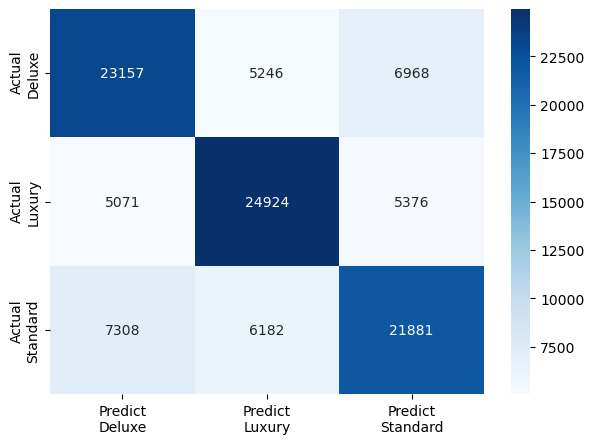

Test


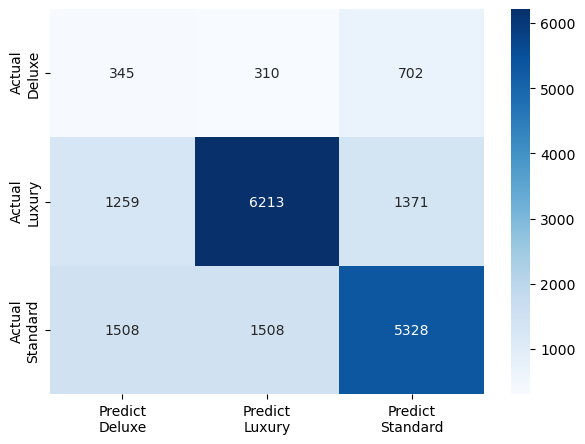


Performance Metrics
Train 
Test Accuracy: 0.6593
Test Precision: 0.6593
Test Recall: 0.6593
Test 
Test Accuracy: 0.6410
Test Precision: 0.6410
Test Recall: 0.6410


----------------------------------------------------------------------------------------------------
Decision Tree Classifier
Classification Report 
Train 
              precision    recall  f1-score   support

           0       0.82      0.73      0.77     35371
           1       0.82      0.77      0.79     35371
           2       0.66      0.76      0.71     35371

    accuracy                           0.75    106113
   macro avg       0.76      0.75      0.76    106113
weighted avg       0.76      0.75      0.76    106113

Test 
              precision    recall  f1-score   support

           0       0.11      0.13      0.12      1357
           1       0.83      0.75      0.79      8843
           2       0.70      0.76      0.73      8344

    accuracy                           0.71     18544
   macro avg       

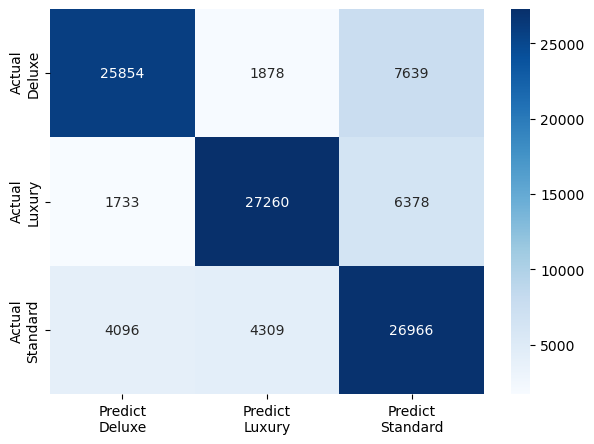

Test


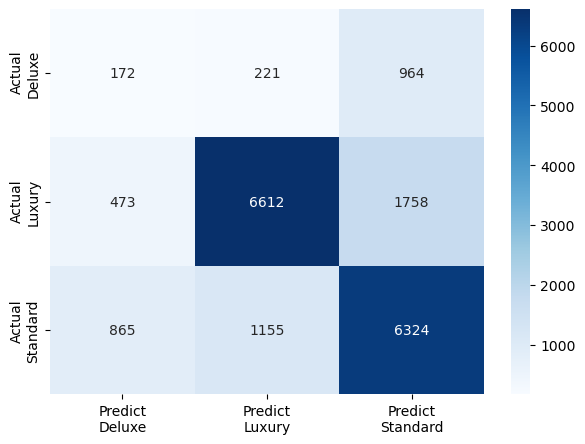


Performance Metrics
Train 
Test Accuracy: 0.7547
Test Precision: 0.7547
Test Recall: 0.7547
Test 
Test Accuracy: 0.7069
Test Precision: 0.7069
Test Recall: 0.7069


----------------------------------------------------------------------------------------------------
Random Forest Classifier
Classification Report 
Train 
              precision    recall  f1-score   support

           0       0.78      0.83      0.81     35371
           1       0.82      0.79      0.81     35371
           2       0.74      0.71      0.73     35371

    accuracy                           0.78    106113
   macro avg       0.78      0.78      0.78    106113
weighted avg       0.78      0.78      0.78    106113

Test 
              precision    recall  f1-score   support

           0       0.13      0.19      0.15      1357
           1       0.83      0.78      0.81      8843
           2       0.75      0.74      0.75      8344

    accuracy                           0.72     18544
   macro avg       

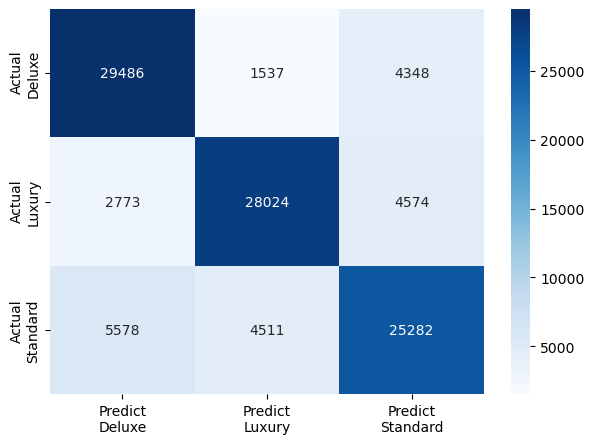

Test


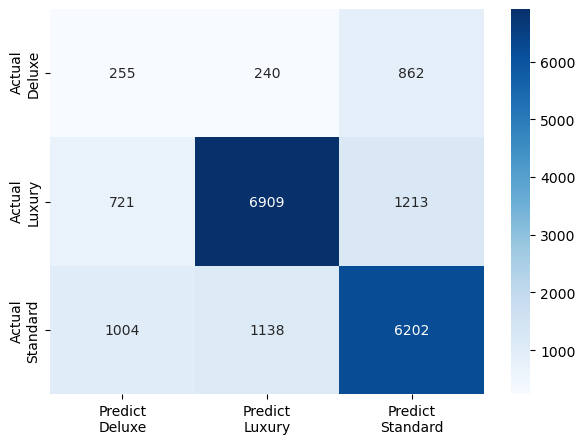


Performance Metrics
Train 
Test Accuracy: 0.7802
Test Precision: 0.7802
Test Recall: 0.7802
Test 
Test Accuracy: 0.7208
Test Precision: 0.7208
Test Recall: 0.7208


----------------------------------------------------------------------------------------------------
Gradient Boosting Classifier
Classification Report 
Train 
              precision    recall  f1-score   support

           0       0.97      0.88      0.93     35371
           1       0.95      0.94      0.94     35371
           2       0.85      0.94      0.89     35371

    accuracy                           0.92    106113
   macro avg       0.92      0.92      0.92    106113
weighted avg       0.92      0.92      0.92    106113

Test 
              precision    recall  f1-score   support

           0       0.28      0.02      0.04      1357
           1       0.89      0.89      0.89      8843
           2       0.78      0.90      0.84      8344

    accuracy                           0.83     18544
   macro avg   

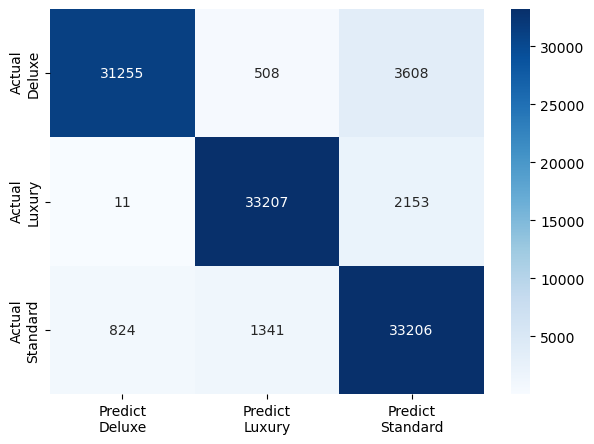

Test


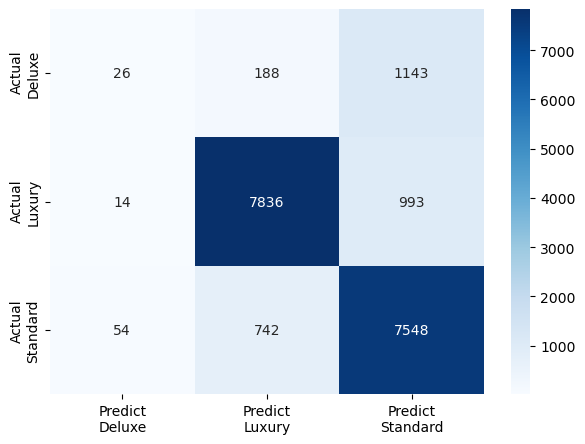


Performance Metrics
Train 
Test Accuracy: 0.9204
Test Precision: 0.9204
Test Recall: 0.9204
Test 
Test Accuracy: 0.8310
Test Precision: 0.8310
Test Recall: 0.8310


----------------------------------------------------------------------------------------------------


In [36]:
# Create an empty Dataframe to store the score of each model
model_score = pd.DataFrame(columns=['Model', 'Score'])

#For each selected models
for selected_model in SELECTED_MODELS:
    #Get Model Name & initialised Model Class
    model_name = selected_model['Model_Name']
    model = eval(selected_model['Model_Class_Name'])
    #Derive the predication of y_train and y_test
    y_train_pred, y_test_pred = model.model_processing(X_train_normalised, y_train_smote, X_test_normalised, 
                                                       ast.literal_eval(selected_model['Model_Hyperparameter']))
    print("\033[1m" + model_name + "\033[0m")
    # Print Classification Report, Confusion Matrix and Performance Matrix
    model.model_rpt_print(y_train_smote, y_train_pred, y_test, y_test_pred)
    # Store the accuracy of each report into a dataframe
    model_acc = accuracy_score(y_test, y_test_pred)
    model_score = model_score._append({'Model': model_name, 'Score': model_acc},ignore_index=True)
    print("\n")
    print("-" * 100)


# Model Evaluation

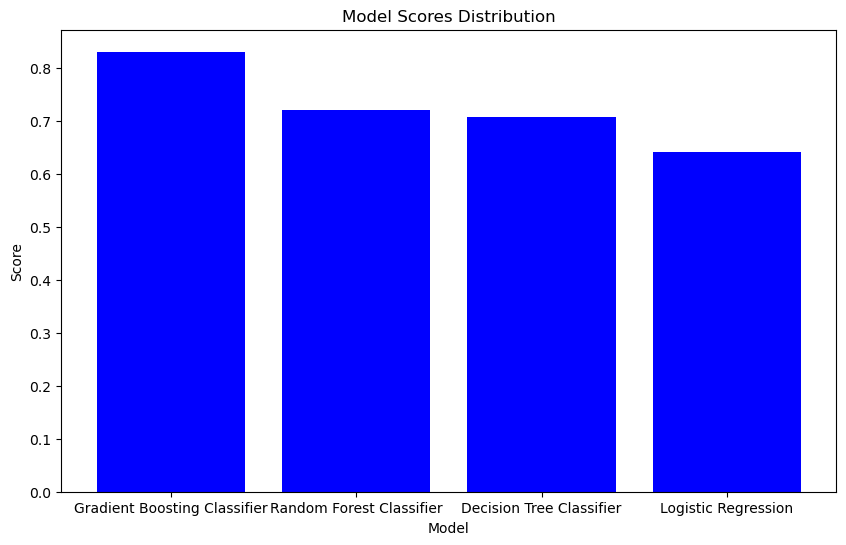

In [37]:
# Visualise the performance of model performance
sorted_models = model_score.sort_values(by = 'Score', ascending = False)

plt.figure(figsize=(10, 6))
plt.bar(sorted_models['Model'], sorted_models['Score'], color='blue')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Scores Distribution')
plt.show()
